In [1]:
import numpy as np
from spatialmath.base import *
from spatialmath import *
from pyquaternion import Quaternion
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

## Rotation Matrix Definition
The 2D rotation matrix for an angle $ \theta $ is given by:

$$ R(\theta) = \begin{bmatrix} \cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix} $$

This matrix rotates a point counterclockwise by \( \theta \) around the origin.

In [4]:
# Example: Rotation by 45 Degrees
theta = np.pi / 4  # 45 degrees in radians
R = rot2(theta)

print("Rotation Matrix (45 Degrees):")
print(R)

Rotation Matrix (45 Degrees):
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## Euler Angles and Roll-Pitch-Yaw (RPY) Angles
Euler angles and RPY angles are two common ways to describe 3D orientations. Both represent rotations as a sequence of three angles, but they differ in the order and axes of rotation.

### Euler angles
Euler angles involve two non sequentially rotations by the same axis. The most common convention is the ZYZ convention.
### Roll-Pitch-Yaw (RPY) Angles
RPY angles describe a sequence of three distinct rotations about fixed axes: 
- Roll: Rotation around the X-axis 
- Pitch: Rotation around the Y-axis 
- Yaw: Rotation around the Z-axis

The most common conventions are XYZ and ZYX.

In [27]:
# Rotation matrix from eular angles
phi, theta, psi = 0.4, 0.2, 0.6
R_euler = eul2r(phi, theta, psi)
print("Euler Rotation Matrix:")
print(R_euler)

# rotation matrix from roll-pitch-yaw angles
roll, pitch, yaw = 0.3, 0.5, 0.4
R_rpy = rpy2r(roll, pitch, yaw)
print("RPY Rotation Matrix:")
print(R_rpy)


Euler Rotation Matrix:
[[ 0.52514923 -0.83110421  0.18298657]
 [ 0.83506437  0.54468531  0.07736548]
 [-0.16396887  0.11217714  0.98006658]]
RPY Rotation Matrix:
[[ 0.80830707 -0.24152969  0.53693863]
 [ 0.34174675  0.93509594 -0.09383358]
 [-0.47942554  0.25934338  0.83838664]]


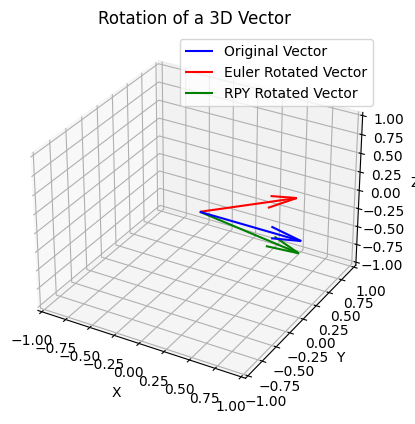

In [28]:
# Define a 3D vector
v = np.array([1, 0, 0])  # Vector along the x-axis

# Apply the Euler rotation matrix
v_eul = R_euler * v

# Apply the RPY rotation matrix
v_rpy = R_rpy * v

# Plot the original and rotated vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, v[0], v[1], v[2], color='b', label='Original Vector')
ax.quiver(0, 0, 0, v_eul[0], v_eul[1], v_eul[2], color='r', label='Euler Rotated Vector')
ax.quiver(0, 0, 0, v_rpy[0], v_rpy[1], v_rpy[2], color='g', label='RPY Rotated Vector')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title("Rotation of a 3D Vector")
plt.show()

### Homogeneous Transformation Matrix
Homogeneous Transformation Matrix is a 4x4 matrix that combines both rotation and translation into a single matrix.

The general form of the matrix is:

$$
T = \begin{bmatrix}
R & t \\
0 & 1
\end{bmatrix}
$$

Where:
- $ R $ is the rotation matrix.
- $ t $ is the translation vector.
- $ 0 $ is a 1x3 row vector of zeros.

In [30]:
# Define a translation vector
translation = [1, 2, 3]  # Translate by (1, 2, 3)

# Define a rotation (using Roll-Pitch-Yaw angles in degrees)
rotation = [30, 45, 60]  # Rotate by 30° about X, 45° about Y, 60° about Z

# Create a homogeneous transformation matrix
T = SE3(translation) * SE3.RPY(rotation, unit='deg')
print("Homogeneous Transformation Matrix (T):")
print(T)

Homogeneous Transformation Matrix (T):
   0.3536   -0.5732    0.7392    1         
   0.6124    0.7392    0.2803    2         
  -0.7071    0.3536    0.6124    3         
   0         0         0         1         



Homogeneous Transformation Matrix (T) using SE3.Rt:
   0.8268   -0.5174   -0.2206    1         
   0.004199  0.3978   -0.9175    2         
   0.5625    0.7576    0.3311    1         
   0         0         0         1         

t = 1, 2, 1; rpy/zyx = 66.4°, -34.2°, 0.291°


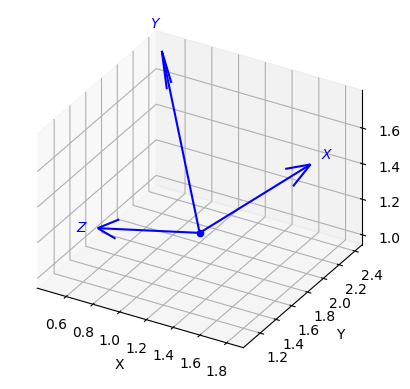

In [21]:
# Create a random 3D rotation matrix
R = SO3.Rand()

# Define a translation vector
t = [1, 2, 1]

# Create a homogeneous transformation matrix
T = SE3.Rt(R, t)
print("Homogeneous Transformation Matrix (T) using SE3.Rt:")
print(T)

# Visualize the transformation
T.printline()
T.plot()

In [33]:
# Define a translation vector
translation = [0.5, 0.0, 0.0]

# Define RPY angles (in radians)
roll = 0.1  # Rotation about X-axis
pitch = 0.2  # Rotation about Y-axis
yaw = 0.3  # Rotation about Z-axis

# Create a homogeneous transformation matrix
T = transl(translation) @ rpy2tr(roll, pitch, yaw, order='xyz')
print("Homogeneous Transformation Matrix (T) using transl and rpy2tr:")
print(T)

Homogeneous Transformation Matrix (T) using transl and rpy2tr:
[[ 0.97517033 -0.0978434   0.19866933  0.5       ]
 [ 0.153792    0.94470249 -0.28962948  0.        ]
 [-0.15934508  0.31299183  0.93629336  0.        ]
 [ 0.          0.          0.          1.        ]]


Let’s apply the transformation to a 3D point and visualize the result:

Original Point: [1 0 0]
Transformed Point: [ 1.47517033  0.153792   -0.15934508]


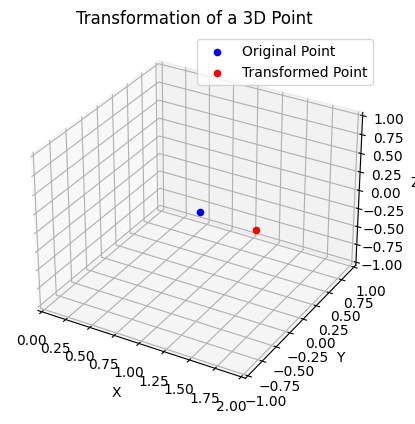

In [40]:
# Define a 3D point
p = np.array([1, 0, 0])  # Point at (1, 0, 0)

# Convert the point to homogeneous coordinates
p_homogeneous = np.append(p, 1)

# Apply the transformation
p_transformed_homogeneous = T @ p_homogeneous

# Convert back to 3D coordinates
p_transformed = p_transformed_homogeneous[:3]

# Print the transformed point
print("Original Point:", p)
print("Transformed Point:", p_transformed)

# Plot the original and transformed points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[0], p[1], p[2], color='b', label='Original Point')
ax.scatter(p_transformed[0], p_transformed[1], p_transformed[2], color='r', label='Transformed Point')
ax.set_xlim([0, 2])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title("Transformation of a 3D Point")
plt.show()

## Quaternion
Quaternions are an extension of complex numbers to four dimensions. They are often preferred over rotation matrices or Euler angles because they are more compact, avoid gimbal lock, and are computationally efficient for interpolation. A quaternion can be represented as:
$$
q = w + xi + yj + zk
$$

Where:
- $w$ is the scalar (real) part.
- $x, y, z$ are the vector (imaginary) parts.
- $i, j, k$ are the fundamental quaternion units.

A quaternion can also be written in vector form as $q = [w, x, y, z]$.

For representing rotations, quaternions are typically **unit quaternions**, meaning $w^2 + x^2 + y^2 + z^2 = 1$.

In [22]:
# Define Euler angles (in degrees)
euler_angles = [30, 45, 60]  # Rotate by 30° about X, 45° about Y, 60° about Z

# Create a quaternion from Euler angles
q = UnitQuaternion.Eul(euler_angles, unit='deg')
print("Quaternion from Euler Angles:")
print(q)

Quaternion from Euler Angles:
 0.6533 <<  0.0990,  0.3696,  0.6533 >>


In [23]:
# Define a random rotation matrix
R = SO3.Rand()

# Create a quaternion from the rotation matrix
q = UnitQuaternion(R)
print("Quaternion from Rotation Matrix:")
print(q)

Quaternion from Rotation Matrix:
 0.5065 <<  0.1838, -0.3086, -0.7839 >>


In [8]:
# Convert quaternion to rotation matrix
R = q.R
print("Rotation Matrix from Quaternion:")
print(R)

Rotation Matrix from Quaternion:
[[-0.47427567  0.61829183  0.62671987]
 [ 0.87863162  0.28762953  0.38115053]
 [ 0.05539912  0.73142632 -0.67966644]]


In [24]:
# Convert quaternion to Euler angles (in degrees)
euler_angles = q.eul(unit='deg')
print("Euler Angles from Quaternion:")
print(euler_angles)

Euler Angles from Quaternion:
[153.65253296  42.10026622  92.08485849]


Original Point: [1 0 0]
Rotated Point: [-0.4193313  -0.90750559  0.02438999]


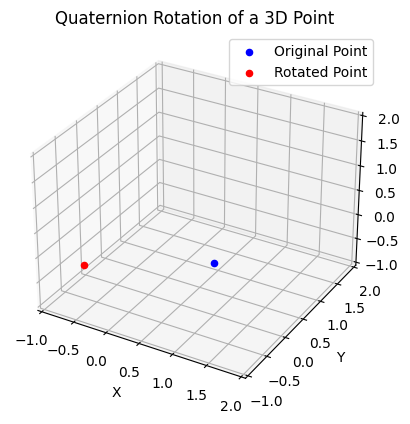

In [25]:
# Define a 3D point
p = np.array([1, 0, 0])  # Point at (1, 0, 0)

# Apply the quaternion rotation
p_rotated = q * p

# Print the rotated point
print("Original Point:", p)
print("Rotated Point:", p_rotated)

# Plot the original and rotated points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p[0], p[1], p[2], color='b', label='Original Point')
ax.scatter(p_rotated[0], p_rotated[1], p_rotated[2], color='r', label='Rotated Point')
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title("Quaternion Rotation of a 3D Point")
plt.show()

For **rotations**, quaternions are often written in the form:

$$
q = \left[\cos\left(\frac{\theta}{2}\right), \, \sin\left(\frac{\theta}{2}\right) \cdot \mathbf{v}\right]
$$

Where:
- $ \theta $ is the **angle of rotation**.
- $ \mathbf{v} = [v_x, v_y, v_z] $ is the **unit vector** representing the **axis of rotation**.

In [26]:
# A quaternion representing a 90-degree rotation around the X-axis
w = np.cos(np.pi / 4)  # cos(π/4)
x = np.sin(np.pi / 4)  # sin(π/4)
y = 0
z = 0

# Create the quaternion
q = Quaternion(np.array([w, x, y, z]))

print("Quaternion representing a 90-degree rotation about the X-axis:")
print(q)

Quaternion representing a 90-degree rotation about the X-axis:
0.707 +0.707i +0.000j +0.000k


In [27]:
# Define an axis and angle
axis = [1, 0, 0]  # Rotate about the X-axis
angle = np.radians(45)  # Rotate by 45 degrees

# Create a quaternion from axis-angle representation
q = UnitQuaternion.AngVec(angle, axis)
print("Quaternion from Axis-Angle Representation:")
print(q)

Quaternion from Axis-Angle Representation:
 0.9239 <<  0.3827,  0.0000,  0.0000 >>
